In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df=df.drop(['State'],axis=1)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
df=df.rename({'R&D Spend':'rd','Administration':'admin','Marketing Spend':'ms'},axis=1)


In [6]:
df.head()

,rd,admin,ms,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

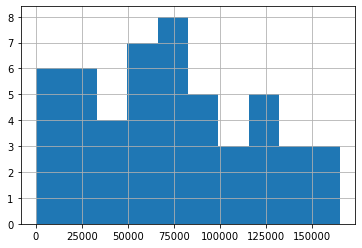

In [7]:
df['rd'].hist()

<AxesSubplot:>

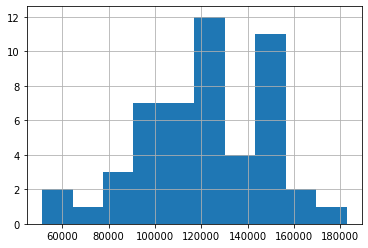

In [8]:
df['admin'].hist()

<AxesSubplot:>

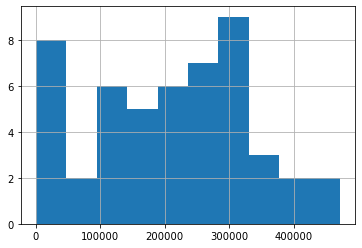

In [9]:
df['ms'].hist()

<AxesSubplot:>

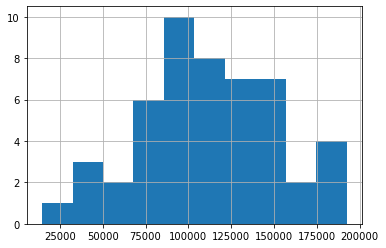

In [10]:
df['Profit'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x234bc7b7e88>,
 'caps': [<matplotlib.lines.Line2D at 0x234bc7d35c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x234bc7c9ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x234bc7d3f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x234bc7d3f88>],
 'means': []}

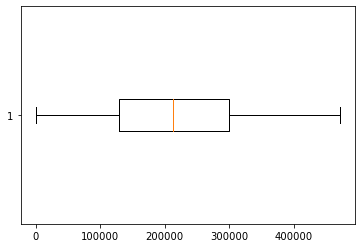

In [11]:
plt.boxplot(df['ms'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x234bc79bdc8>,
 'caps': [<matplotlib.lines.Line2D at 0x234bc7bdb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x234bc79b608>],
 'medians': [<matplotlib.lines.Line2D at 0x234bc6f6c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x234bc801e08>],
 'means': []}

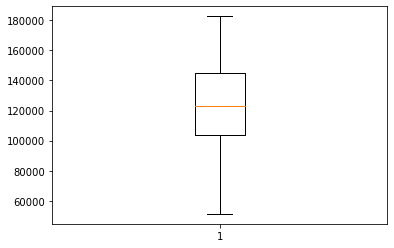

In [12]:
plt.boxplot(df['admin'],vert=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x234bc87a1c8>,
 'caps': [<matplotlib.lines.Line2D at 0x234bc89ab88>,
 'boxes': [<matplotlib.lines.Line2D at 0x234bc893ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x234bc89f948>],
 'fliers': [<matplotlib.lines.Line2D at 0x234bc8a4808>],
 'means': []}

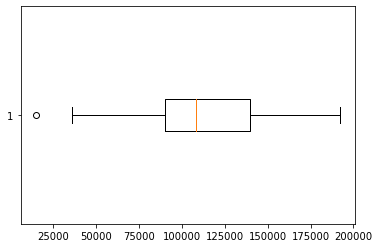

In [13]:
plt.boxplot(df['Profit'],vert=False)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)
data=pd.DataFrame(data,index=df.index,columns=df.columns)
data.head()

,rd,admin,ms,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [15]:
data.corr()

,rd,admin,ms,Profit
rd,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [16]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~ms+admin+rd',data=data).fit()

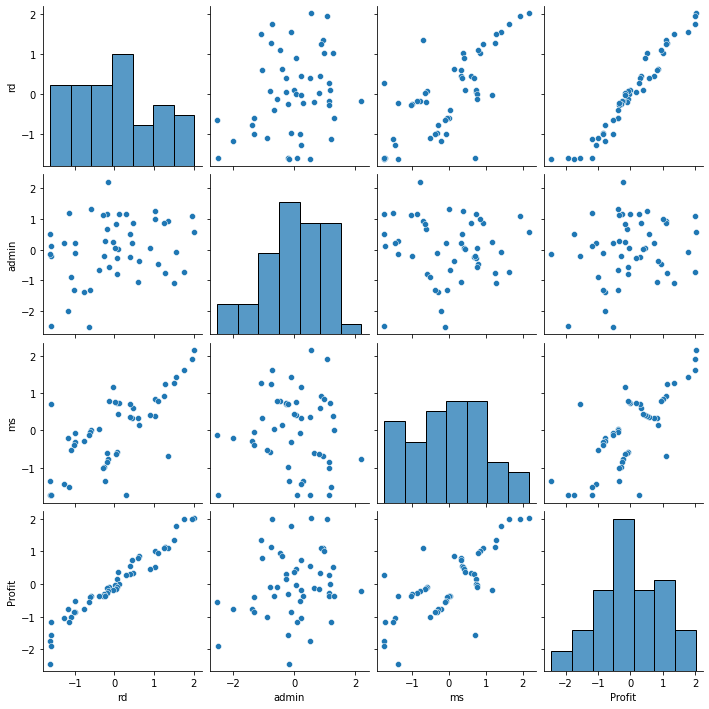

In [17]:
sns.pairplot(data)

In [18]:
model.params

Intercept   -5.204170e-16
ms           8.261087e-02
admin       -1.864043e-02
rd           9.175798e-01
dtype: float64

In [19]:
print(model.tvalues,'\n',model.pvalues)

Intercept   -1.590412e-14
ms           1.655077e+00
admin       -5.255068e-01
rd           1.784637e+01
dtype: float64 
 Intercept    1.000000e+00
ms           1.047168e-01
admin        6.017551e-01
rd           2.634968e-22
dtype: float64


In [20]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [21]:
m1_ms=smf.ols('Profit~ms',data=data).fit()
print(m1_ms.tvalues,m1_ms.pvalues)

Intercept   -5.430358e-15
ms           7.802657e+00
dtype: float64 Intercept    1.000000e+00
ms           4.381073e-10
dtype: float64


In [22]:
m1_admin=smf.ols('Profit~admin',data=data).fit()
print(m1_admin.tvalues,m1_admin.pvalues)

Intercept   -3.680455e-15
admin        1.419493e+00
dtype: float64 Intercept    1.000000
admin        0.162217
dtype: float64


In [23]:
m1_ma=smf.ols('Profit~admin+ms',data=data).fit()
print(m1_ma.tvalues,m1_ma.pvalues)

Intercept   -5.711023e-15
admin        2.467779e+00
ms           8.281039e+00
dtype: float64 Intercept    1.000000e+00
admin        1.729198e-02
ms           9.727245e-11
dtype: float64


In [24]:
rsq_ms=smf.ols('ms~admin+rd',data=data).fit().rsquared
vif_ms=1/(1-rsq_ms)

In [25]:
rsq_admin=smf.ols('admin~ms+rd',data=data).fit().rsquared
vif_admin=1/(1-rsq_admin)

In [26]:
rsq_rd=smf.ols('rd~admin+ms',data=data).fit().rsquared
vif_rd=1/(1-rsq_rd)

In [27]:
d1=({'Variables':['rsq_ms','rsq_rd','rsq_admin'],'VIF':[vif_ms,vif_rd,vif_admin]})
vif_var=pd.DataFrame(d1)
vif_var

,Variables,VIF
0,rsq_ms,2.326773
1,rsq_rd,2.468903
2,rsq_admin,1.175091


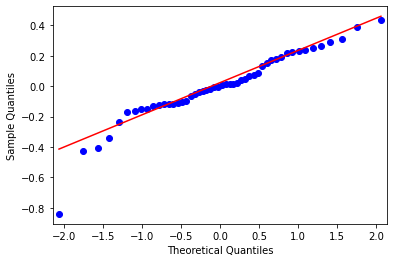

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [29]:
list(np.where(model.resid<-.6))

[array([49], dtype=int64)]

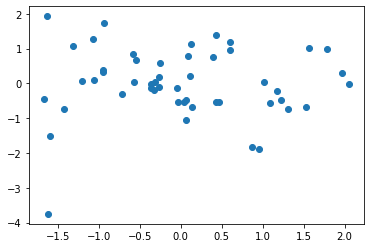

In [30]:
def get_standardized_values (vals):
    return (vals - vals.mean())/ vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.show()

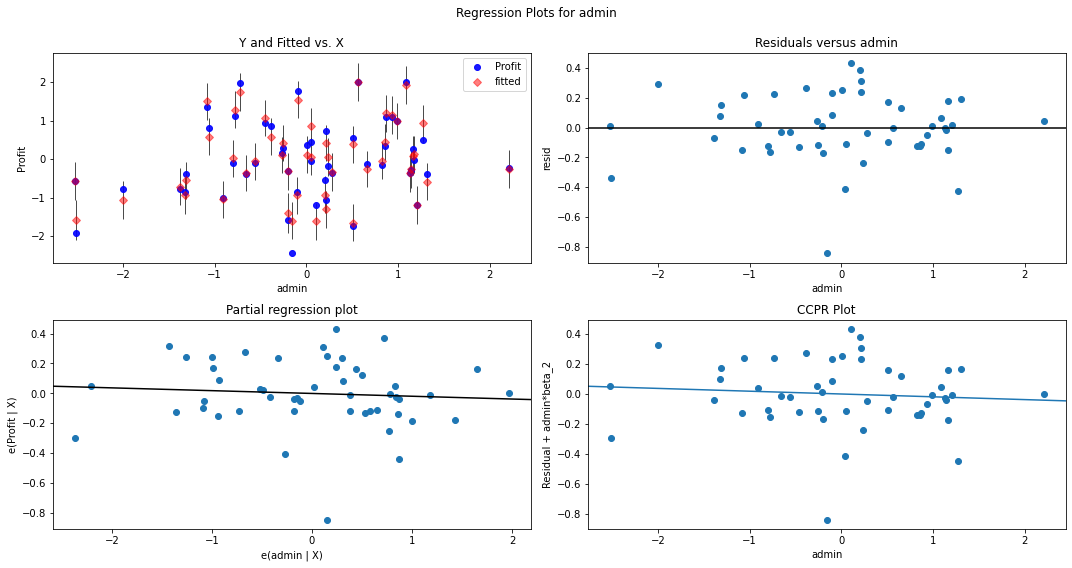

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'admin',fig=fig)

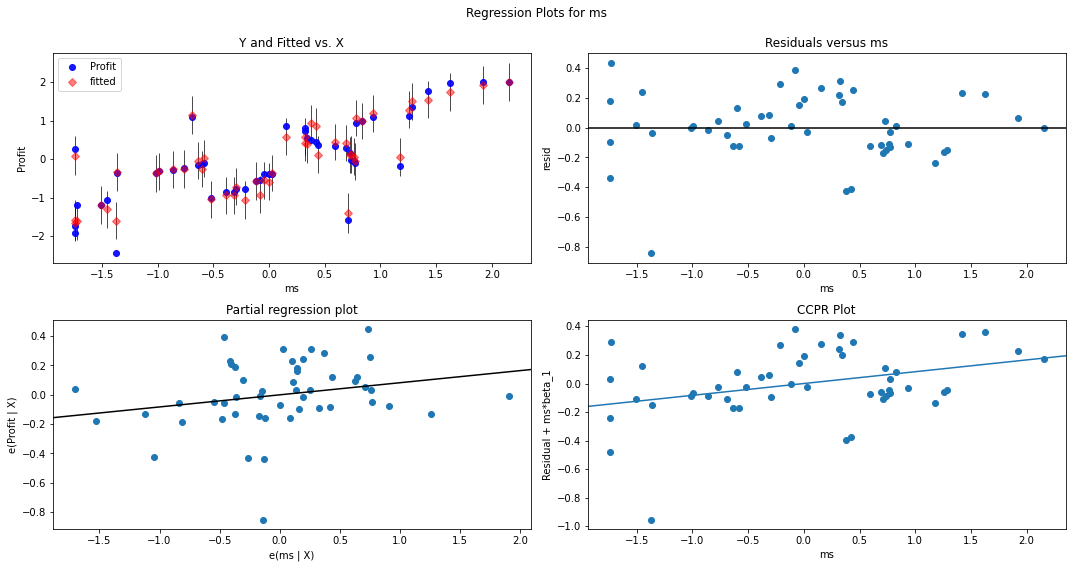

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ms',fig=fig)

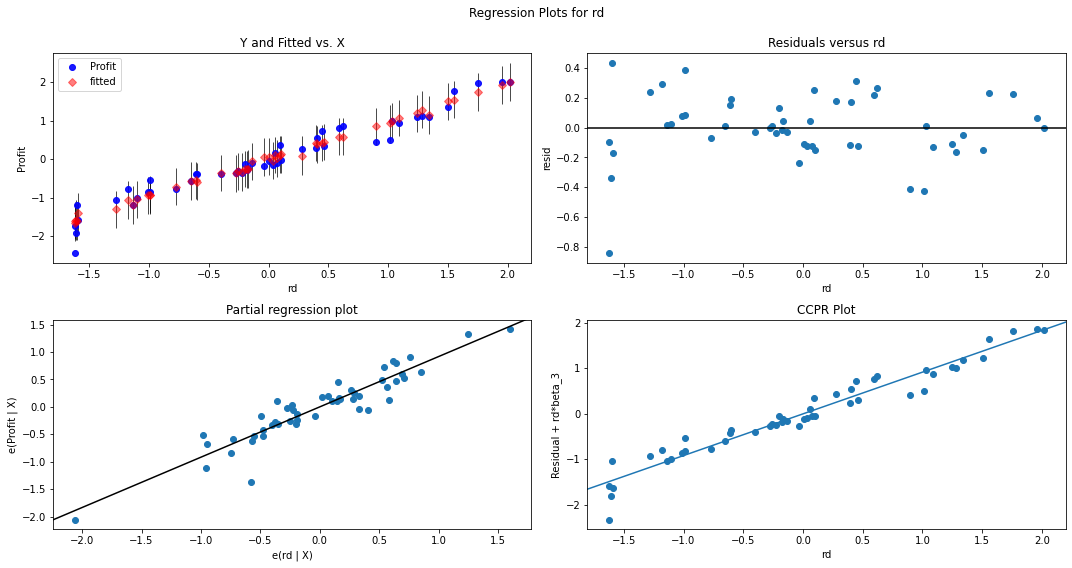

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'rd',fig=fig)

In [34]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

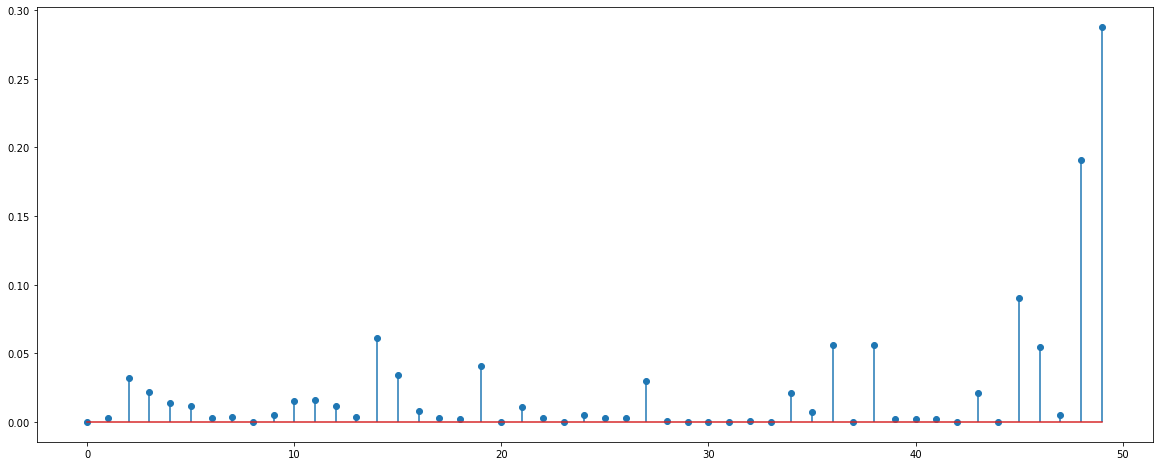

In [35]:
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))

In [36]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

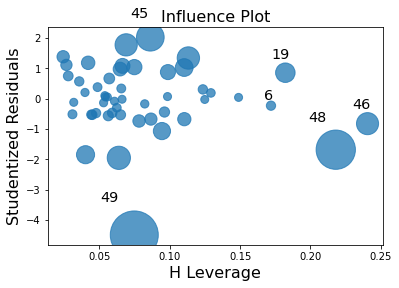

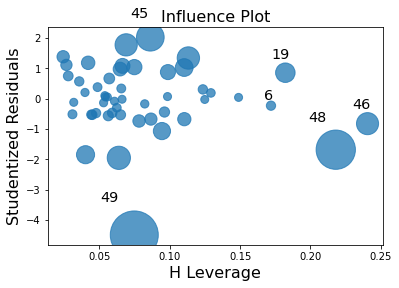

In [37]:
influence_plot(model)

In [38]:
data[data.index.isin([49])]

,rd,admin,ms,Profit
49,-1.622362,-0.157226,-1.369985,-2.439313


In [39]:
data=data.drop(data.index[[49]],axis=0).reset_index()

In [40]:
data.head()

,index,rd,admin,ms,Profit
0,0,2.016411,0.560753,2.153943,2.011203
1,1,1.955860,1.082807,1.923600,1.999430
2,2,1.754364,-0.728257,1.626528,1.980842
3,3,1.554784,-0.096365,1.422210,1.776627
4,4,1.504937,-1.079919,1.281528,1.357740


In [41]:
data=data.drop('index',axis=1)

In [42]:
data.head()

,rd,admin,ms,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [43]:
model1=smf.ols('Profit~ms+admin+rd',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           8.85e-32
Time:                        03:19:02   Log-Likelihood:                 12.831
No. Observations:                  49   AIC:                            -17.66
Df Residuals:                      45   BIC:                            -10.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0182      0.028      0.654      0.516      -0.038       0.074
ms             0.0766      0.042      1.825      0.075      -0.008       0.161
admin         -0.0154      0.030     -0.518      0.607      -0.075       0.045
rd             0.8917      0.044     20.470      0.000       0.804       0.979
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
d=({'Parameters':['R^2','R^2_adj','AIC'],'Model values':[model.rsquared,model.rsquared_adj,model.aic],'Final MOdel':[model1.rsquared,model1.rsquared,model1.aic]})

In [45]:
table=pd.DataFrame(d)
table.head()

,Parameters,Model values,Final MOdel
0,R^2,0.950746,0.961316
1,R^2_adj,0.947534,0.961316
2,AIC,-0.644375,-17.662259


In [46]:
pred_model=pd.DataFrame(data)
model1_pred=model1.predict(pred_model)

In [47]:
d1={"Real Value":data["Profit"],"Model1":model1_pred}


In [48]:
Result_frame=pd.DataFrame(d1)

In [49]:
Result_frame

,Real Value,Model1
0,2.011203,1.972479
1,1.999430,1.892793
2,1.980842,1.718321
3,1.776627,1.514959
4,1.357740,1.474919
5,1.127250,1.267383
6,1.105481,1.146052
7,1.096210,1.186311
8,1.007470,0.985341
9,0.946022,1.058222
